In [1]:
# imports
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import Lensing as l
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import Planck18
from astropy.cosmology import WMAP9

In [2]:
# Source Parameters
## =================
rs = 10*u.arcsec # length of the source (unrotated) along the y-axis
e = 0 # eccentricity
I_0 = 1*u.W/u.arcsec**2 # intensity constant
source_x = 0*u.arcsec # x-coord of source center
source_y = 0*u.arcsec # y-coord of source center
phi = 0 # rotation of source vertical axis from y-axis

In [3]:
# Lens Parameters
## ===============
## SIS 1
sigma_v1 = 1400*u.km/u.s # velocity dispersion
s1_x = 0*u.arcsec # x-coord of center of lens
s1_y = 0*u.arcsec # y-coord of center of lens

# ## SIS 2
# sigma_v2 = 1400*u.km/u.s # velocity dispersion
# s2_x = -25*u.arcsec # x-coord of center of lens
# s2_y = -25*u.arcsec # y-coord of center of lens

# ## SIS 3
# sigma_v3 = 900*u.km/u.s # velocity dispersion
# s3_x = 0*u.arcsec # x-coord of center of lens
# s3_y = 50*u.arcsec # y-coord of center of lens

In [4]:
# Distance Parameters
## =================
zlens = 0.3 # redshift of the lens
zsource = 1.0 # redshift of the source

dL = Planck18.angular_diameter_distance(zlens) # distance from the viewer to the lens plane
dS = Planck18.angular_diameter_distance(zsource) # distance from the viewer to the source plane
dLS = Planck18.angular_diameter_distance_z1z2(zlens, zsource) # distance from the lens plane to the source

## Einstein ring radii
ee_r1 = l.ee_r(sigma_v1, dL, dS).to('arcsec')
#ee_r2 = (l.ee_r(sigma_v2, dL, dS).to('arcsec')
#ee_r3 = (l.ee_r(sigma_v3, dL, dS).to('arcsec')

ee_r1

<Quantity 31.57003892 arcsec>

In [5]:
# Making a coordinate grid to represent each point in space
n = 450

x0 = np.linspace(-60, 60, n)*u.arcsec
y0 = np.linspace(-60, 60, n)*u.arcsec

## combining to get a full cartesian coordinate grid ranging from (-1,-1) to (1,1)
x, y = np.meshgrid(x0,y0)

In [6]:
# Calculating beta
alpha1 = l.SIS_deflection_angle(s1_x, s1_y, ee_r1, x, y)
#alpha2 = l.SIS_deflection_angle(s2_x, s2_y, ee_r2, x, y)
#alpha3 = l.SIS_deflection_angle(s3_x, s3_y, ee_r3, x, y)

beta_x = x - alpha1[0]# - alpha2[0]# - alpha3[0]
beta_y = y - alpha1[1]# - alpha2[1]# - alpha3[1]

In [9]:
# Plotting the deflection angles
a = 56
x_quiver = x[::a, ::a] # every ath element
y_quiver = y[::a, ::a]

quiver_xcomp = beta_x[::a, ::a] - x_quiver
quiver_ycomp = beta_y[::a, ::a] - y_quiver

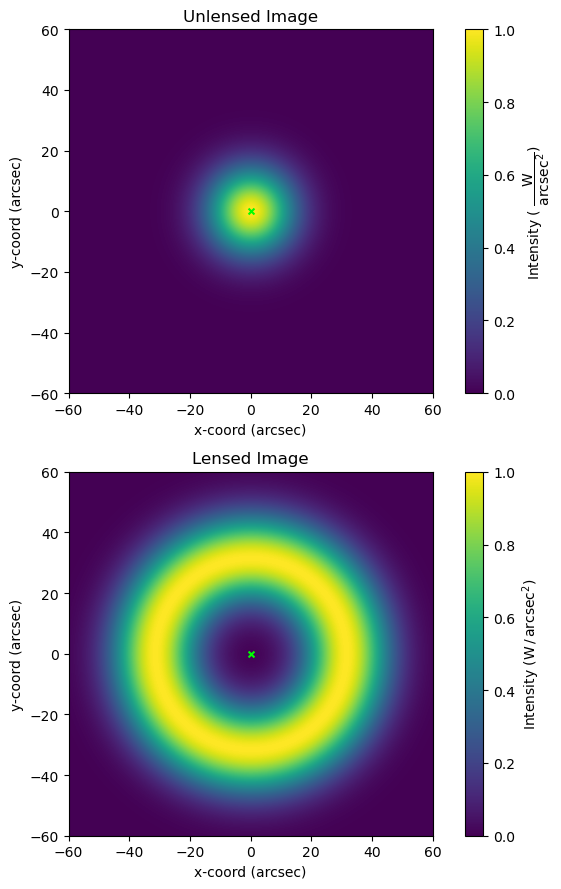

In [8]:
# Graphing the unlensed and lensed source

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,9))

## Unlensed galaxy
## ==============
intensity_unlensed = l.gaussian_source_intensity_rot(beta_x = x, beta_y = y, rs = rs, phi = phi, e = e, I_0=I_0, source_x = source_x, source_y = source_y)

unlensed_plot = ax1.imshow(intensity_unlensed.to_value('W/arcsec^2'), origin = 'lower', extent = [-60,60,-60,60], vmin=0, vmax=1)

# ax1.quiver(x_quiver.to_value('arcsec'), y_quiver.to_value('arcsec'), quiver_xcomp.to_value('arcsec'), quiver_ycomp.to_value('arcsec'), color = 'white', width = 1/300, angles='xy', scale_units='xy', scale=1)

# titles
ax1.set_title('Unlensed Image')
ax1.set(xlabel='x-coord (arcsec)', ylabel='y-coord (arcsec)')

# lens locations
ax1.scatter(s1_x.to_value('arcsec'), s1_y.to_value('arcsec'), color='lime', marker='x', s=18)
#ax1.scatter(s2_x.to_value('arcsec'),s2_y.to_value('arcsec'), color='lime', marker='x', s=18)
#ax1.scatter(s3_x.to_value('arcsec'),s3_y.to_value('arcsec'), color='lime', marker='x', s=18)

# colors
plt.colorbar(unlensed_plot,fraction=0.046, pad=0.04, label='Intensity (' + ' $\dfrac{\mathrm{W}}{\mathrm{arcsec}^2}$)')
unlensed_plot.set_cmap('viridis')



## Lensed galaxy
## ============
intensity_tf = l.gaussian_source_intensity_rot(beta_x = beta_x, beta_y = beta_y, rs = rs, phi = phi, e = e, I_0=I_0, source_x = source_x, source_y = source_y)

lensed_plot = ax2.imshow(intensity_tf.to_value('W/arcsec^2'), origin='lower', extent=[-60,60,-60,60], vmin=0, vmax=1)

# ax2.quiver(x_quiver.to_value('arcsec'), y_quiver.to_value('arcsec'), quiver_xcomp.to_value('arcsec'), quiver_ycomp.to_value('arcsec'), color = 'white', width = 1/300, angles='xy', scale_units='xy', scale=1)

# lens locations
ax2.scatter(s1_x.to_value('arcsec'), s1_y.to_value('arcsec'), color='lime', marker='x', s=18)
#ax2.scatter(s2_x.to_value('arcsec'), s2_y.to_value('arcsec'), color='lime', marker='x', s=18)
#ax2.scatter(s3_x.to_value('arcsec'),s3_y.to_value('arcsec'), color='lime', marker='x', s=18)

# titles
ax2.set_title('Lensed Image')
ax2.set(xlabel='x-coord (arcsec)', ylabel='y-coord (arcsec)')

# colors
plt.colorbar(lensed_plot,fraction=0.046, pad=0.04, label='Intensity (' + '$\mathrm{W} \, / \, \mathrm{arcsec}^2$)') # not sure what the alternative is to \text{} in python latex
lensed_plot.set_cmap('viridis')

## display both
plt.tight_layout()
plt.show()